In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
# Load the dataset
# GET DF FROM DB
# Connect to .db file 
conn = sqlite3.connect("../heart.db")
query = "SELECT * FROM heart_attack_risk"
# Load the query result into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()


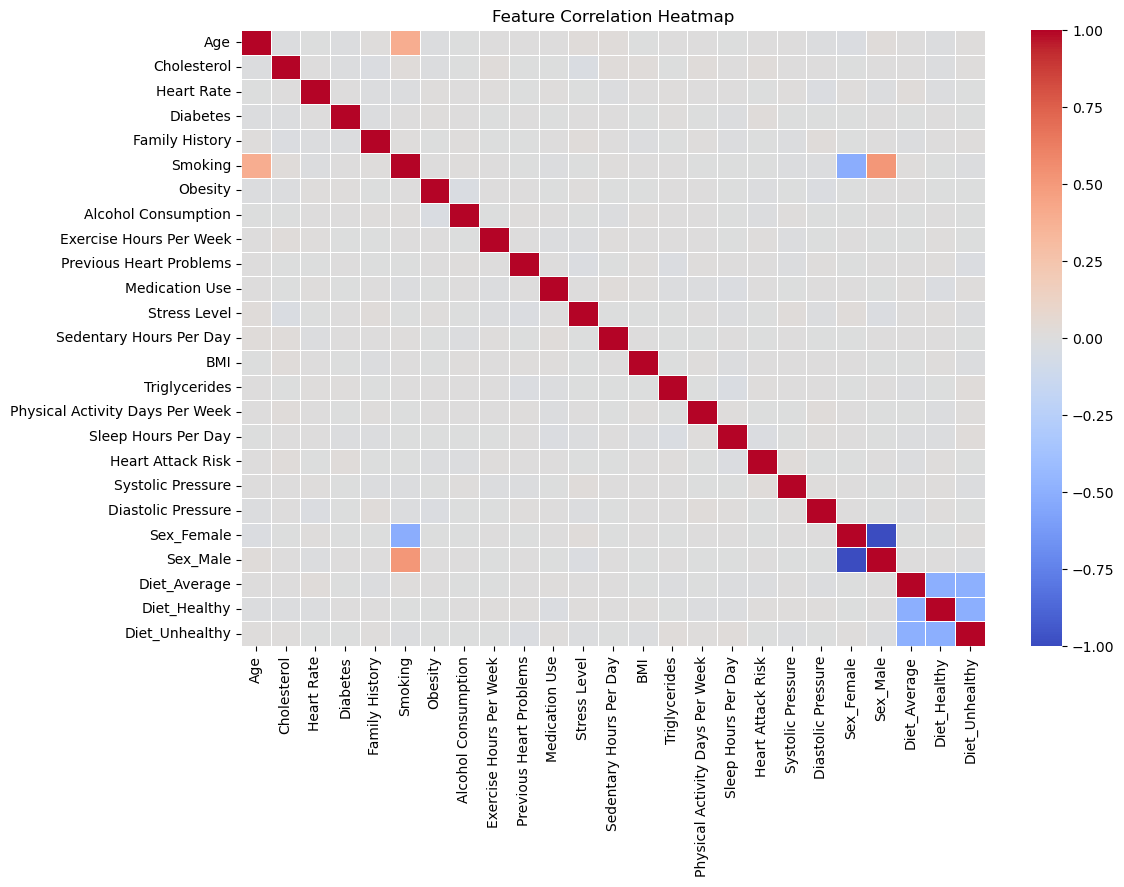

In [4]:
# Plot the heatmap to check feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("../Images/feature_correlation_heatmap.png")
plt.show()



C:\Users\poper\AppData\Local\Temp\ipykernel_30160\1679834676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["blue", "pink"])


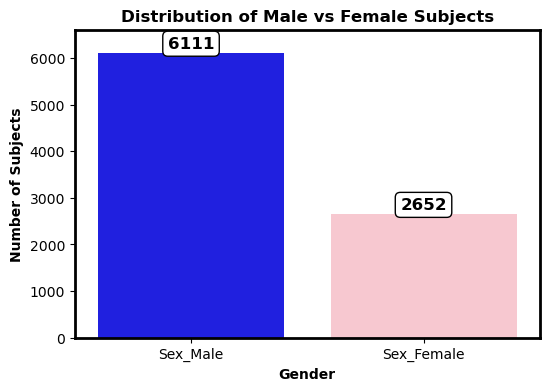

In [5]:
# Count the number of males and females
gender_counts = df[["Sex_Male", "Sex_Female"]].sum()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["blue", "pink"])

# Add labels and title
plt.xlabel("Gender",fontweight='bold')
plt.ylabel("Number of Subjects",fontweight='bold')
plt.title("Distribution of Male vs Female Subjects",fontweight='bold')
plt.ylim(0, max(gender_counts.values) + 500)  # Adjust y-axis for better visibility

# Show the values on top of the bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 100, str(count), ha='center', fontsize=12,fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))  # Bold-bordered text box)

# Add bold borders around the whole plot
plt.gca().spines["top"].set_linewidth(2)
plt.gca().spines["right"].set_linewidth(2)
plt.gca().spines["bottom"].set_linewidth(2)
plt.gca().spines["left"].set_linewidth(2)

#Export Figure to Image Cache as PNG filetype
plt.savefig("../Images/Sex_Population.png")

# Display the plot
plt.show()


In [6]:
# Drop redundant features (highly correlated ones)
df_cleaned = df.drop(columns=["Diastolic Pressure", "Sex_Female"])  # Keeping only one of the correlated pairs



In [7]:
# Define features and target variable
X = df_cleaned.drop(columns=["Heart Attack Risk"])
y = df_cleaned["Heart Attack Risk"]



In [8]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [9]:
# Train a RandomForestClassifier with class weighting to handle imbalance
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [10]:
# Make predictions
y_pred = model.predict(X_test)



In [11]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")



Model Accuracy: 64.12%


In [12]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.47      0.01      0.03       628

    accuracy                           0.64      1753
   macro avg       0.56      0.50      0.40      1753
weighted avg       0.58      0.64      0.51      1753

